# Retail Explanatory Data Analysis

#### Imports 

In [216]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings
warnings.filterwarnings('ignore')

In [217]:
retail_df = pd.read_excel('/Users/darylwanji/Desktop/Data Projects /Darylwanji-Data-Insights-for-Call-Center-Efficiency-and-Performance/Data/Online Retail Data Set.xlsx')
retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
126495,547081,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2011-03-20 15:07:00,7.95,14205.0,United Kingdom
521417,580366,23169,CLASSIC GLASS COOKIE JAR,6,2011-12-02 16:38:00,0.00,NaN,United Kingdom
2675,536592,22198,LARGE POPCORN HOLDER,2,2010-12-01 17:06:00,3.36,NaN,United Kingdom
451399,575206,23452,HEART MINI PORTRAIT FRAME,12,2011-11-09 10:26:00,1.65,14298.0,United Kingdom
314040,564558,84970S,HANGING HEART ZINC T-LIGHT HOLDER,24,2011-08-26 08:59:00,0.85,12704.0,Finland


### Understanding Data Structure

In [218]:
retail_df.shape

(541909, 8)

> 541,909 Observations for 8 variables

In [219]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> CustomerID and Description have some null values, 

In [220]:
retail_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


#### Data Cleaning 

In [221]:
# Check for missing values
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [222]:
# Drop duplicates
retail_df = retail_df.drop_duplicates()
retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
432038,573808,22553,PLASTERS IN TIN SKULLS,2,2011-11-01 11:29:00,1.65,14419.0,United Kingdom
36097,539437,84920,PINK FLOWER FABRIC PONY,1,2010-12-17 14:54:00,7.62,NaN,United Kingdom
529279,580730,23311,VINTAGE CHRISTMAS STOCKING,1,2011-12-05 17:28:00,4.96,NaN,United Kingdom
221547,556256,84944,SET OF 6 KASHMIR FOLKART BAUBLES,12,2011-06-09 17:37:00,1.65,14309.0,United Kingdom
377531,569555,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,12,2011-10-05 08:17:00,1.45,17728.0,United Kingdom


In [223]:
# Convert 'CustomerID' column from float to string
# Fill Missing values with 0, convert to int then String
# Replace 0 with Other
retail_df['CustomerID'] = retail_df['CustomerID'].fillna(0).astype(int).astype(str)
retail_df['CustomerID'] = retail_df['CustomerID'].replace('0','Other')

In [224]:
# Replace null values with None 
retail_df['Description'] = retail_df['Description'].fillna("None")

In [225]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


In [226]:
# Check for missing values
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

> No Null values after cleaning

In [227]:
# Adding TotalRevenue column
retail_df['TotalRevenue'] = retail_df['Quantity'] * retail_df['UnitPrice']

# Display the DataFrame with the new column
retail_df = retail_df[['CustomerID','InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'TotalRevenue','Country']]
retail_df.sample(5)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalRevenue,Country
197401,14911,553901,22637,PIGGY BANK RETROSPOT,6,2011-05-19 17:48:00,2.55,15.30,EIRE
293926,14911,562670,85014B,RED RETROSPOT UMBRELLA,3,2011-08-08 13:42:00,5.95,17.85,EIRE
260236,17405,559804,21507,"ELEPHANT, BIRTHDAY CARD,",12,2011-07-12 14:17:00,0.42,5.04,United Kingdom
64357,14572,541604,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,3,2011-01-19 17:23:00,2.95,8.85,United Kingdom
420779,15821,572909,22624,IVORY KITCHEN SCALES,2,2011-10-26 15:48:00,8.50,17.00,United Kingdom


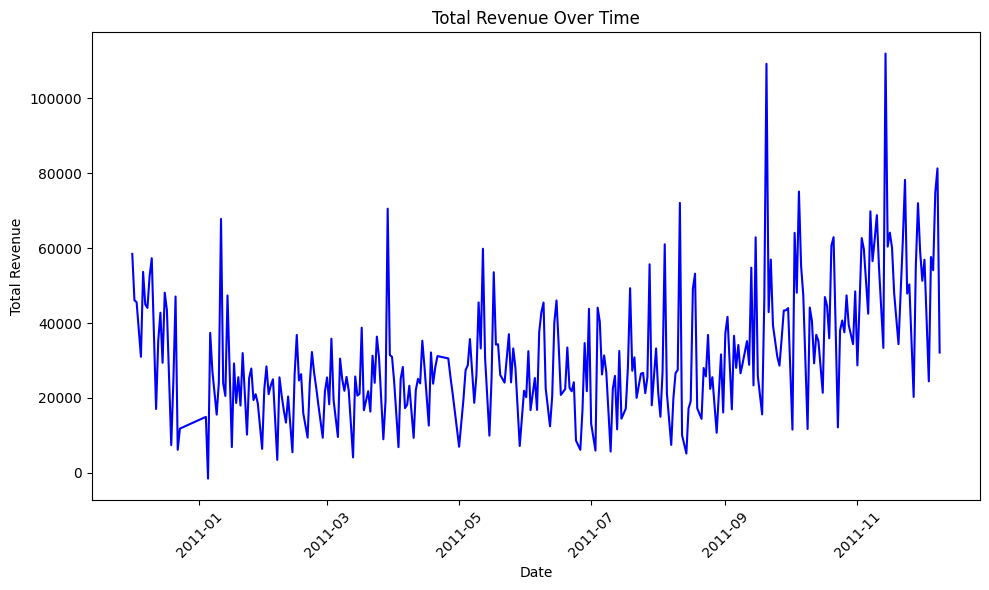

In [228]:
# Group by date and sum TotalRevenue for each day
daily_revenue = retail_df.groupby(retail_df['InvoiceDate'].dt.date)['TotalRevenue'].sum().reset_index()
daily_revenue.columns = ['Date', 'TotalRevenue']

# Plotting the time series using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_revenue, x='Date', y='TotalRevenue', color='b')
plt.title("Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Day with lowest revenue happened in January 2011 (2011-01)        
> Day with Highest revenue happened in November 2011 (2011-11)      
> Daily revenue varies a lot, there are a lot of factors that can affect sales, such as : seasonal proomotions, product availability, Marketing success etc.        

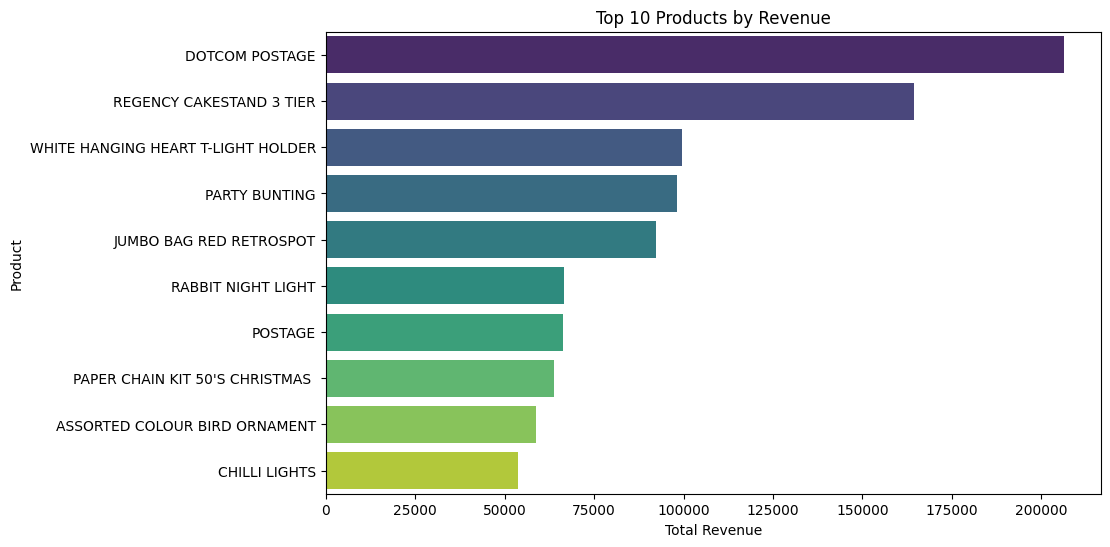

In [229]:
# Calculate total revenue by product
product_revenue = retail_df.groupby('Description')['TotalRevenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=product_revenue, x='TotalRevenue', y='Description', palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.show()

> Dotcom postage makes the Most revenue.

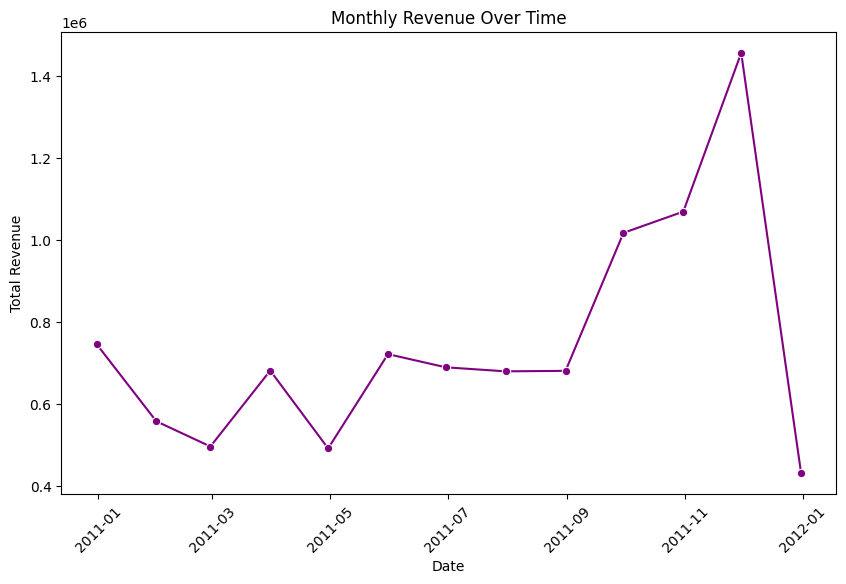

In [230]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
monthly_revenue = retail_df.set_index('InvoiceDate').resample('M')['TotalRevenue'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='purple')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

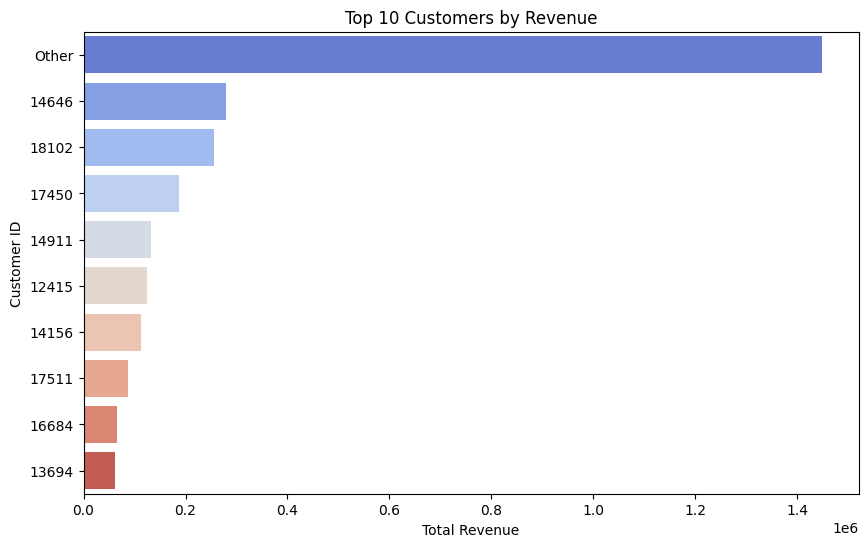

In [231]:
top_customers = retail_df.groupby('CustomerID')['TotalRevenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='TotalRevenue', y='CustomerID', palette='coolwarm')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.show()

Customers with Missing Customer ID made about 5x more than the customer with the largest revenue (14646)

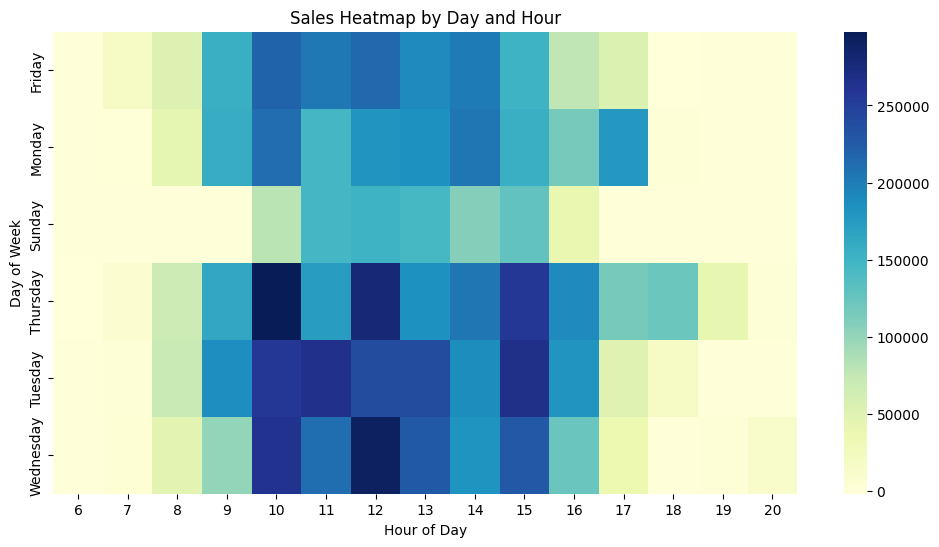

In [232]:
retail_df['Hour'] = retail_df['InvoiceDate'].dt.hour
retail_df['DayOfWeek'] = retail_df['InvoiceDate'].dt.day_name()

sales_heatmap = retail_df.pivot_table(index='DayOfWeek', columns='Hour', values='TotalRevenue', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=False, fmt=".0f")
plt.title("Sales Heatmap by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


> Store has no sales on Saturday, can be due to hours of operation, errors in data collection or other factors. To be investigated.     
> Store seem to be opened from 8 am - 7 pm.         
> Store makes the most sales between 10 am and 4 pm.        
> Sunday the slowest day        
> Thursday is the busiest day       

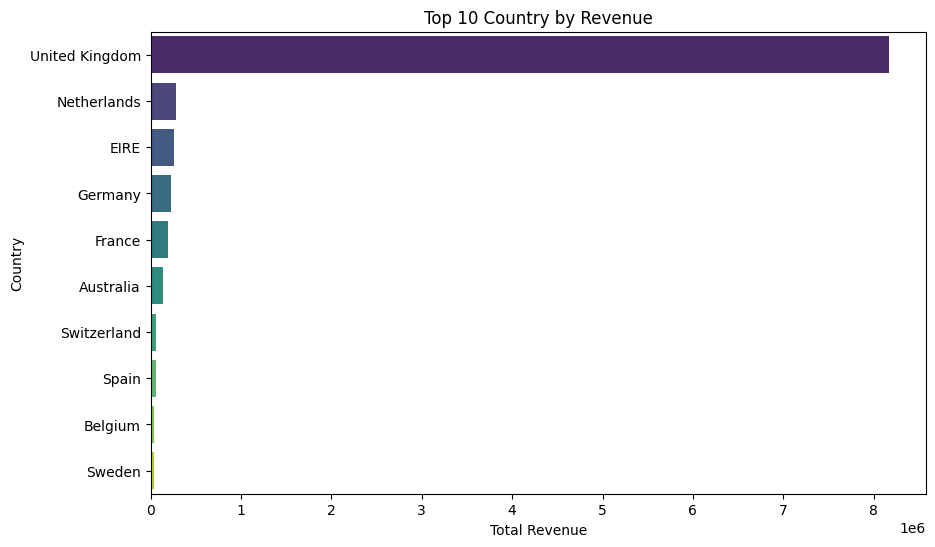

In [235]:
# Calculate total revenue by country
country_revenue = retail_df.groupby('Country')['TotalRevenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_revenue, x='TotalRevenue', y='Country', palette='viridis')
plt.title("Top 10 Country by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()

> Store market sales is maily in UK     
> Out of the top 10 countries, 9 are in Europe. 